In [243]:
#import relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [244]:
#import the dataset
df=pd.read_csv('Dataset 1- Indeed_Raw_Data.csv', index_col=0)

In [245]:
df.head(5)

,Job_title,Company_name,Location,Salary,Job_Description
0,"Apple Media Products (AMP)- Big Data Analyst, ...",Apple,London,NaN,"Summary\nPosted: Jan 28, 2020\nWeekly Hours: 3..."
1,Lead Software Engineer,Northrop Grumman UK,London,NaN,Are you an experienced Software Engineer who w...
2,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton SO14,"£18,369 a year",This is an exciting opportunity to be an Appre...
3,Machine Learning Engineer,GMV,Oxford,NaN,Description\nThe GMV UK Machine Learning Team ...
4,Machine Learning Engineer,Cyberlens Ltd.,London EC4N,"£45,000 - £53,000 a year",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 0 to 793
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_title        794 non-null    object
 1   Company_name     794 non-null    object
 2   Location         792 non-null    object
 3   Salary           211 non-null    object
 4   Job_Description  794 non-null    object
dtypes: object(5)
memory usage: 37.2+ KB


## Data Cleaning Agenda

#### drop Unnamed column
#### Drop null values
#### Location column: just city- remove everything else
#### Salary column: 
        remove ,,a year"
        calculate yearly salary if necessary/ remove hourly salary
        For Ranges( min / max column)
        calculate mean
        Calculate $
        


In [247]:
# remove column Unnamed:0

# alternative 1
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# alternative 2
#df_example=pd.read_csv('Dataset 1- Indeed_Raw_Data.csv', index_col=0)
#df_example.head(2)

# alternative 3
#df_alt_3= pd.read_csv('Indeed_Raw_Data.csv')
#df_alt_3.head(2)
#df_alt_3.drop('Unnamed: 0', axis='columns')


#### Handling missing values

In [248]:
df.isna()

,Job_title,Company_name,Location,Salary,Job_Description
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
789,False,False,False,False,False
790,False,False,False,True,False
791,False,False,False,False,False
792,False,False,False,True,False


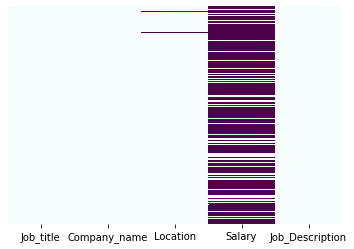

In [249]:
#check missing values in a heatmap
sns.heatmap(df.isna(), yticklabels=False,cbar=False,cmap='BuPu')

In [250]:
df=df.dropna()

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 2 to 791
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_title        211 non-null    object
 1   Company_name     211 non-null    object
 2   Location         211 non-null    object
 3   Salary           211 non-null    object
 4   Job_Description  211 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


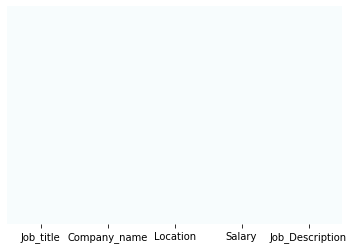

In [252]:
#check emtpy values again after dropping
sns.heatmap(df.isna(), yticklabels=False,cbar=False,cmap='BuPu')

#### Editing location name

In [253]:
#default split on white space
df['Location']=df['Location'].apply(lambda x: x.split()[0])

In [254]:
df.head()

,Job_title,Company_name,Location,Salary,Job_Description
2,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,"£18,369 a year",This is an exciting opportunity to be an Appre...
4,Machine Learning Engineer,Cyberlens Ltd.,London,"£45,000 - £53,000 a year",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...
6,Deep Learning Engineer (Signal Processing),Drone Defence,Retford,"£25,000 - £35,000 a year",Are you a Deep Learning Engineer experienced w...
11,Senior Machine Learning Engineer / Machine Lea...,Nucleome Therapeutics Ltd,Oxford,"£35,000 - £58,000 a year",Job description\nWe are looking for machine le...
12,Senior Software Engineer,WCKD RZR,London,"£35,000 - £80,000 a year",Are you a highly motivated Senior Software Eng...


#### Editing salary column

In [255]:
df.head(2)

,Job_title,Company_name,Location,Salary,Job_Description
2,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,"£18,369 a year",This is an exciting opportunity to be an Appre...
4,Machine Learning Engineer,Cyberlens Ltd.,London,"£45,000 - £53,000 a year",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...


In [256]:
#remove ,,a year"
df['Salary']=df['Salary'].apply(lambda x: x.strip('a year'))

In [257]:
df['Salary']

2                £18,369
4      £45,000 - £53,000
6      £25,000 - £35,000
11     £35,000 - £58,000
12     £35,000 - £80,000
             ...        
780    £45,000 - £55,000
782    £55,000 - £65,000
786              £55,000
789    £55,000 - £80,000
791    £60,000 - £65,000
Name: Salary, Length: 211, dtype: object

In [258]:
# remove £ sign
df['Salary']=df['Salary'].apply(lambda x: x.replace('£', ''))

In [259]:
df['Salary']

2               18,369
4      45,000 - 53,000
6      25,000 - 35,000
11     35,000 - 58,000
12     35,000 - 80,000
            ...       
780    45,000 - 55,000
782    55,000 - 65,000
786             55,000
789    55,000 - 80,000
791    60,000 - 65,000
Name: Salary, Length: 211, dtype: object

In [260]:
#reset index (we dropped more than 2/3 of our values due to missing values)
df=df.reset_index()

In [261]:
df['Salary']

0               18,369
1      45,000 - 53,000
2      25,000 - 35,000
3      35,000 - 58,000
4      35,000 - 80,000
            ...       
206    45,000 - 55,000
207    55,000 - 65,000
208             55,000
209    55,000 - 80,000
210    60,000 - 65,000
Name: Salary, Length: 211, dtype: object

In [262]:
#drop Salary entries which are paid per hour(Trainee/Internships)
#other possibility: take average - but here we drop that values
df[df['Salary'].str.contains("hou")]

,index,Job_title,Company_name,Location,Salary,Job_Description
9,34,Trainee Rail Track Operative,Direct Tools Supplies,Birmingham,9.25 - 13.25 an hou,Do you want a career working in rail infrastru...
12,43,Internship (8 week placement) Exploring the li...,University of Bath,Bath,9 an hou,Faraday Undergraduate Summer Experiences (FUSE...
16,55,Internship (8 week placement) Role of cation i...,University of Bath,Bath,9 an hou,Faraday Undergraduate Summer Experiences (FUSE...
21,74,Trainee Rail Track Operative,Direct Tools Supplies,Bury,9.25 - 13.20 an hou,Do you want a career working in rail infrastru...


In [263]:
df=df[~df['Salary'].str.contains('an hou')]

In [264]:
df['Salary'].iloc[60:70]

64    30,000 - 40,000
65    70,000 - 90,000
66             11,255
67    35,000 - 38,000
68    30,000 - 40,000
69    65,000 - 80,000
70             45,000
71            550 a d
72    40,000 - 50,000
73    35,000 - 60,000
Name: Salary, dtype: object

In [180]:
#a d values (paying per day)
df[df['Salary']=='500 - 550 a d']['Job_Description']

93     Job Description\nThis is an exciting opportuni...
141    Data Scientist ( Python / Machine Learning )\n...
Name: Job_Description, dtype: object

In [265]:
#splitting salary values on hyphen
#set up minimum salary values -after that setting up maximum values to get the average
df['Salary_min']=df['Salary'].apply(lambda x: x.split('-')[0])

In [266]:
df.head()

,index,Job_title,Company_name,Location,Salary,Job_Description,Salary_min
0,2,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,"18,369",This is an exciting opportunity to be an Appre...,"18,369"
1,4,Machine Learning Engineer,Cyberlens Ltd.,London,"45,000 - 53,000",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...,"45,000"
2,6,Deep Learning Engineer (Signal Processing),Drone Defence,Retford,"25,000 - 35,000",Are you a Deep Learning Engineer experienced w...,"25,000"
3,11,Senior Machine Learning Engineer / Machine Lea...,Nucleome Therapeutics Ltd,Oxford,"35,000 - 58,000",Job description\nWe are looking for machine le...,"35,000"
4,12,Senior Software Engineer,WCKD RZR,London,"35,000 - 80,000",Are you a highly motivated Senior Software Eng...,"35,000"


In [267]:
def salary_max(salary):
    if '-' in salary.lower():
        return salary.split('-')[1]
    else:
        return salary

In [268]:
df['Salary_max']=df['Salary'].apply(salary_max)

In [269]:
df.head()

,index,Job_title,Company_name,Location,Salary,Job_Description,Salary_min,Salary_max
0,2,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,"18,369",This is an exciting opportunity to be an Appre...,"18,369","18,369"
1,4,Machine Learning Engineer,Cyberlens Ltd.,London,"45,000 - 53,000",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...,"45,000","53,000"
2,6,Deep Learning Engineer (Signal Processing),Drone Defence,Retford,"25,000 - 35,000",Are you a Deep Learning Engineer experienced w...,"25,000","35,000"
3,11,Senior Machine Learning Engineer / Machine Lea...,Nucleome Therapeutics Ltd,Oxford,"35,000 - 58,000",Job description\nWe are looking for machine le...,"35,000","58,000"
4,12,Senior Software Engineer,WCKD RZR,London,"35,000 - 80,000",Are you a highly motivated Senior Software Eng...,"35,000","80,000"


In [272]:
#one entry with weekly salary- multiply by 53 to get annual salary
df.iloc[145]

index                                                            591
Job_title                                          Big Data Engineer
Company_name                                           Linux Recruit
Location                                                      London
Salary                                              550 - 650 a week
Job_Description    We have a brand new requirement for a Big Data...
Salary_min                                                      550 
Salary_max                                                650 a week
Name: 149, dtype: object

In [273]:
#change value for weekly salary (min)
df.at[149, 'Salary_min']= 550*53

In [274]:
#change value for weekly salary (max)
def week_in_year(week):
    if week ==  ' 650 a week':
        return 650*53
    else:
        return week

In [275]:
#apply value for weekly salary (max)
df['Salary_max']=df['Salary_max'].apply(week_in_year)

In [276]:
df.iloc[145]

index                                                            591
Job_title                                          Big Data Engineer
Company_name                                           Linux Recruit
Location                                                      London
Salary                                              550 - 650 a week
Job_Description    We have a brand new requirement for a Big Data...
Salary_min                                                     29150
Salary_max                                                     34450
Name: 149, dtype: object

In [295]:
# remove ,a d':
# 'a d' means a day

# we work with 220 working days in 2020 in england
def remove_ad(ad):
    if ' a d' in ad.lower():
        return int(ad.strip(' a d'))*220
    else:
        return ad

In [297]:
df['Salary_min']=df['Salary_min'].apply(remove_ad)
df['Salary_max']=df['Salary_max'].apply(remove_ad)

In [292]:
#modifying daily salaries
#assuming that 2020 has 220 working days

def modify_id(sal_min):
    
    if sal_min == '500':
        return (int(sal_min) *220)
    if sal_min == '425':
        return (int(sal_min) *220)
    if sal_min == '700':
        return (int(sal_min) *220)
    if sal_min == '650':
        return (int(sal_min) *220)
    if sal_min == '600':
        return (int(sal_min) *220)
    if sal_min == '450':
        return (int(sal_min) *220)
   
    
    else:
        return sal_min

In [293]:
df['Salary_min']=df['Salary_min'].apply(modify_id)

In [294]:
#remove white spaces
df['Salary_min']=df['Salary_min'].apply(lambda x: str(x).strip())

In [196]:
df.head()

,index,Job_title,Company_name,Location,Salary,Job_Description,Salary_min,Salary_max
0,2,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,"18,369",This is an exciting opportunity to be an Appre...,"18,369","18,369"
1,4,Machine Learning Engineer,Cyberlens Ltd.,London,"45,000 - 53,000",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...,"45,000","53,000"
2,6,Deep Learning Engineer (Signal Processing),Drone Defence,Retford,"25,000 - 35,000",Are you a Deep Learning Engineer experienced w...,"25,000","35,000"
3,11,Senior Machine Learning Engineer / Machine Lea...,Nucleome Therapeutics Ltd,Oxford,"35,000 - 58,000",Job description\nWe are looking for machine le...,"35,000","58,000"
4,12,Senior Software Engineer,WCKD RZR,London,"35,000 - 80,000",Are you a highly motivated Senior Software Eng...,"35,000","80,000"


In [111]:
# to string
df['Salary_min']=df['Salary_min'].apply(str)

In [112]:
# to string
df['Salary_max']=df['Salary_max'].apply(str)

In [114]:
#remove underscore
def remove_underscore(x):
    for i in x:
        if ',' in x:
            return x.replace(',','')
        else:
            return x

In [115]:
df['Salary_max']=df['Salary_max'].apply(remove_underscore)

In [116]:
df['Salary_min']=df['Salary_min'].apply(remove_underscore)

In [118]:
# remove spaces
def remove_spaces(x):
    if ' ' in x:
        return x.replace(' ', '')
    else:
        return x

In [119]:
df['Salary_max']=df['Salary_max'].apply(remove_spaces)

In [120]:
df['Salary_min']=df['Salary_min'].apply(remove_spaces)

In [302]:
# convert string to int
df['Salary_max']=df['Salary_max'].astype(int)

In [303]:
# convert string to int
df['Salary_min']=df['Salary_min'].astype(int)

In [304]:
# calculate mean salary 
df['Salary_Average in £']= ((df['Salary_max']+df['Salary_min'])/2)

In [744]:
#calculate $ (# exchange rate: 1£ == 1.27 $ )
df['Salary_Average in $'] = df['Salary_Average in £']*1.27

In [745]:
#salary cleaning done!
df.head()

,Job_title,Company_name,Location,Salary,Job_Description,Salary_min,Salary_max,Salary_Average,Salary_Average in £,Salary_Average in $
0,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,"18,369",This is an exciting opportunity to be an Appre...,18369,18369,18369.0,18369.0,23328.63
1,Machine Learning Engineer,Cyberlens Ltd.,London,"45,000 - 53,000",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...,45000,53000,49000.0,49000.0,62230.00
2,Deep Learning Engineer (Signal Processing),Drone Defence,Retford,"25,000 - 35,000",Are you a Deep Learning Engineer experienced w...,25000,35000,30000.0,30000.0,38100.00
3,Senior Machine Learning Engineer / Machine Lea...,Nucleome Therapeutics Ltd,Oxford,"35,000 - 58,000",Job description\nWe are looking for machine le...,35000,58000,46500.0,46500.0,59055.00
4,Senior Software Engineer,WCKD RZR,London,"35,000 - 80,000",Are you a highly motivated Senior Software Eng...,35000,80000,57500.0,57500.0,73025.00


### Skillset Screening

In [756]:
df.columns

Index(['Job_title', 'Company_name', 'Location', 'Salary', 'Job_Description',
       'Salary_min', 'Salary_max', 'Salary_Average', 'Salary_Average in £',
       'Salary_Average in $', 'Python-Skills'],
      dtype='object')

In [789]:
df['Python_Skills']=df['Job_Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [761]:
df['R_Skills']=df['Job_Description'].apply(lambda x: 1 if 'r-studio' in x.lower() or 'r-programming' in x.lower() or 'r studio' in x.lower() or 'r programming' in x.lower() else 0)

In [762]:
df['Java_Skills']=df['Job_Description'].apply(lambda x: 1 if 'java' in x.lower() else 0)

In [ ]:
df['AWS_Skills']=df['Job_Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [ ]:
df['Hadoop_Skills']=df['Job_Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)

In [763]:
df['SQL_Skills']=df['Job_Description'].apply(lambda x: 1 if 'sql' in x.lower() or 'sequel' in x.lower() else 0)

In [764]:
df['Spark_Skills']=df['Job_Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [765]:
df['Matlab_Skills']=df['Job_Description'].apply(lambda x: 1 if 'matlab' in x.lower() else 0)

In [766]:
df['Tensorflow_Skills']=df['Job_Description'].apply(lambda x: 1 if 'tensor' in x.lower() else 0)

In [767]:
df['NLP_Skills']=df['Job_Description'].apply(lambda x: 1 if 'nlp' in x.lower() else 0)

In [768]:
df.head()

,Job_title,Company_name,Location,Salary,Job_Description,Salary_min,Salary_max,Salary_Average,Salary_Average in £,Salary_Average in $,Python-Skills,Python_Skills,R_Skills,Java_Skills,SQL_Skills,Spark_Skills,Matlab_Skills,Tensorflow_Skills,NLP_Skills
0,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,"18,369",This is an exciting opportunity to be an Appre...,18369,18369,18369.0,18369.0,23328.63,0,0,0,0,0,0,0,0,0
1,Machine Learning Engineer,Cyberlens Ltd.,London,"45,000 - 53,000",Company: CyberLens Ltd (www.cyberlens.eu)\nLoc...,45000,53000,49000.0,49000.0,62230.00,1,1,0,0,0,0,0,1,0
2,Deep Learning Engineer (Signal Processing),Drone Defence,Retford,"25,000 - 35,000",Are you a Deep Learning Engineer experienced w...,25000,35000,30000.0,30000.0,38100.00,1,1,0,0,0,0,0,1,0
3,Senior Machine Learning Engineer / Machine Lea...,Nucleome Therapeutics Ltd,Oxford,"35,000 - 58,000",Job description\nWe are looking for machine le...,35000,58000,46500.0,46500.0,59055.00,1,1,0,0,0,0,0,1,0
4,Senior Software Engineer,WCKD RZR,London,"35,000 - 80,000",Are you a highly motivated Senior Software Eng...,35000,80000,57500.0,57500.0,73025.00,0,0,0,1,0,0,0,0,0


In [778]:
df['Python-Skills'].value_counts()

1    123
0     84
Name: Python-Skills, dtype: int64

In [774]:
df['R_Skills'].value_counts()

0    202
1      5
Name: R_Skills, dtype: int64

In [786]:
df['Company_name'].value_counts()

Linux Recruit                         25
Harnham                               21
Oho Group                             11
Understanding Recruitment             10
Venturi                                9
                                      ..
Synaptek                               1
Spring                                 1
Manchester Metropolitan University     1
Sentinel                               1
ADR Markets                            1
Name: Company_name, Length: 86, dtype: int64

In [793]:
df.drop(('Salary_Average in £'), axis=1, inplace=True)

In [795]:
df.head(1)

,Job_title,Company_name,Location,Job_Description,Salary_Average in $,R_Skills,Java_Skills,SQL_Skills,Spark_Skills,Matlab_Skills,Tensorflow_Skills,NLP_Skills,Python_Skills
0,Apprentice Radiotherapy Engineer (Clinical Tec...,University Hospital Southampton NHS Foundation...,Southampton,This is an exciting opportunity to be an Appre...,23328.63,0,0,0,0,0,0,0,0


In [799]:
df.to_csv('Modified_Dataset.csv')